In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
data = pd.read_excel('Real estate valuation data set.xlsx')
data.shape

(414, 8)

In [46]:
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


Text(0, 0.5, 'Price [dollars/$m^2$]')

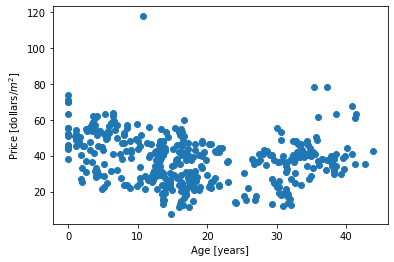

In [47]:
# Graficando las variables de interes
plt.scatter(data['X2 house age'], data['Y house price of unit area'])
plt.xlabel('Age [years]')
plt.ylabel('Price [dollars/$m^2$]')

In [48]:
%%capture
pip install ipywidgets

In [49]:
def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables. 
    """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

In [50]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0])+1, 1)
    return theta

In [65]:
def Multivariable_Linear_Regression(X,y,learningrate, iterations):
    """ Find the multivarite regression model for the data set
         Parameters:
          X: independent variables matrix
          y: dependent variables matrix
          learningrate: learningrate of Gradient Descent
          iterations: the number of iterations
        Return value: the final theta vector and the plot of cost function
    """
    y_new = y # np.reshape(y, (len(y), 1))   
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(vectorX.dot(theta) - y_new)
        theta = theta - learningrate * gradients
        y_pred = vectorX.dot(theta)
        cost_value = 1/(2*len(y))*((y_pred - y)**2) 
        #Calculate the loss for each training instance
        total = 0
        for i in range(len(y)):
            total += cost_value[i][0] 
            #Calculate the cost function for each iteration
        cost_lst.append(total)
    plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return theta

In [66]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [67]:
y.shape

(442,)

In [68]:
X=data.iloc[:,2:5]
Y=data['Y house price of unit area']
Y.shape

(414,)

In [69]:
#normalizar
X = (X - np.min(X))/((np.max(X)-np.min (X)))


In [70]:
X.head()
# estas son nuestras variables más importantes para la regresión multiple


,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,0.730594,0.009513,1.0
1,0.445205,0.043809,0.9
2,0.303653,0.083315,0.5
3,0.303653,0.083315,0.5
4,0.114155,0.056799,0.5


In [71]:
Multivariable_Linear_Regression(X,Y,0.03,1000)

KeyError: 0